# Karate Club

/var/folders/w4/dj_p7yxd4fn49p3ldny5zzsw0000gn/T/ipykernel_15446/970342952.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


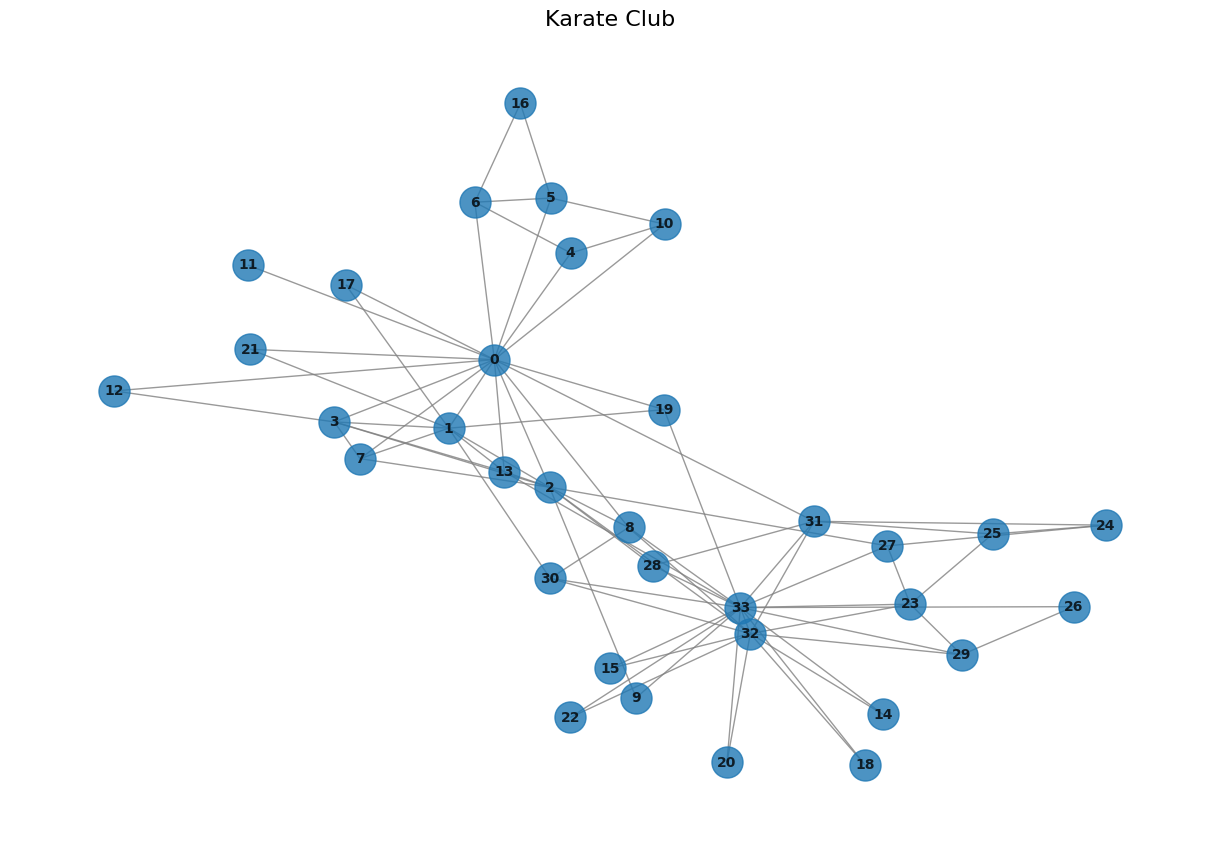

In [47]:
import networkx as nx

G = nx.karate_club_graph()

# Visualización de comunidades con Greedy Modularity
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistency

# Draw the graph with community colors
nx.draw(G, pos, 
        with_labels=True,
        node_size=500,
        cmap=plt.cm.Set3,
        edge_color="gray",
        alpha=0.8,
        font_size=10,
        font_weight='bold')

plt.title("Karate Club", fontsize=16)
plt.tight_layout()
plt.show()

Number of communities: 2
Communities: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


/var/folders/w4/dj_p7yxd4fn49p3ldny5zzsw0000gn/T/ipykernel_15446/1521626042.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


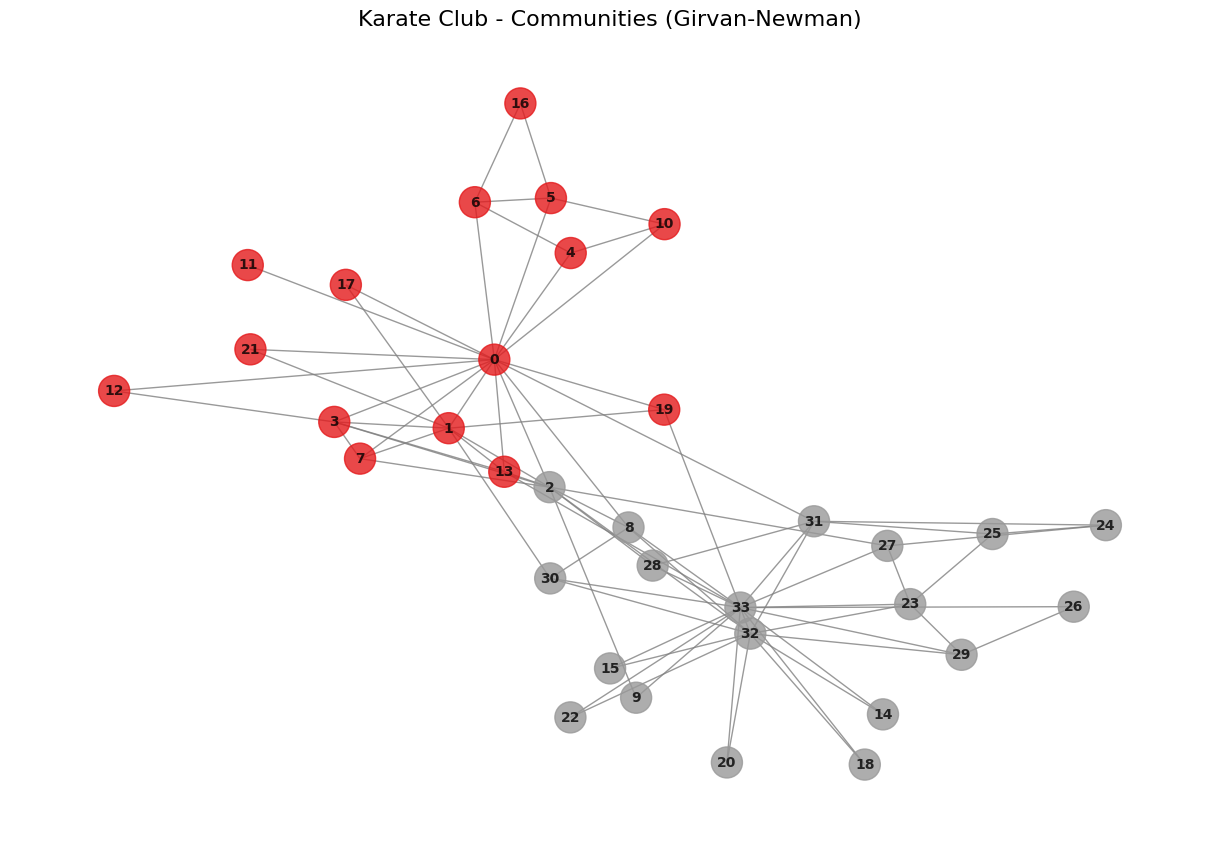

In [48]:
import networkx as nx
from networkx.algorithms.community import girvan_newman

# Crear un grafo de ejemplo
G = nx.karate_club_graph()

# Generador de particiones jerárquicas
comp = girvan_newman(G)

# Obtener la primera partición (dos comunidades)
first_level = next(comp)
comunidades = [list(c) for c in first_level]

print(f"Number of communities: {len(comunidades)}")
print(f"Communities: {comunidades}")

# Visualización de comunidades con Girvan-Newman
import matplotlib.pyplot as plt

# Create color map for nodes
color_map = []
for node in G.nodes():
    for i, comm in enumerate(comunidades):
        if node in comm:
            color_map.append(i)
            break

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Same layout as before

# Draw the graph with community colors
nx.draw(
    G,
    pos,
    node_color=color_map,
    with_labels=True,
    node_size=500,
    cmap=plt.cm.Set1,
    edge_color="gray",
    alpha=0.8,
    font_size=10,
    font_weight="bold",
)

plt.title("Karate Club - Communities (Girvan-Newman)", fontsize=16)
plt.tight_layout()
plt.show()

Number of communities (Louvain): 4
Community 1: [1, 2, 3, 7, 12, 13]
Community 2: [0, 4, 5, 6, 10, 11, 16, 17, 19, 21]
Community 3: [24, 25, 28, 31]
Community 4: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]


/var/folders/w4/dj_p7yxd4fn49p3ldny5zzsw0000gn/T/ipykernel_15446/1951916456.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


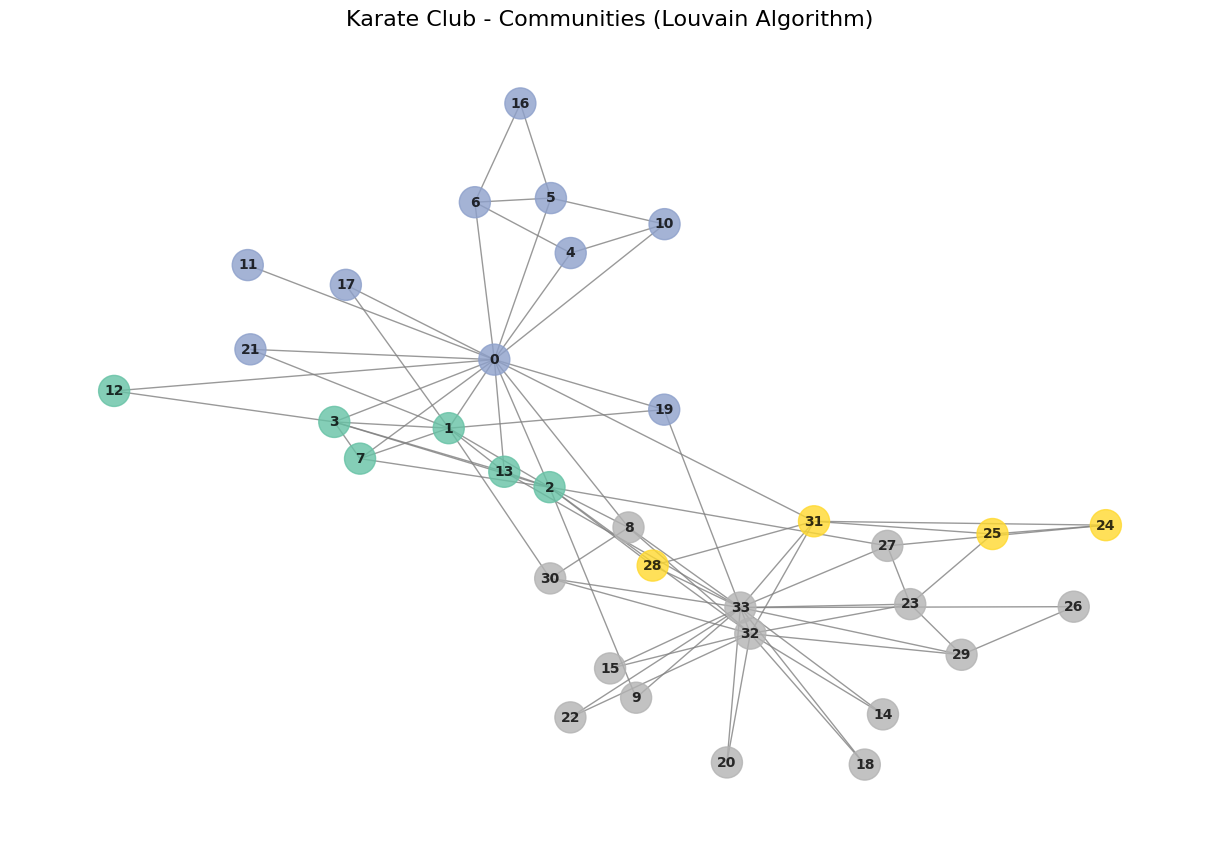


Modularity: 0.4266


In [49]:
import networkx as nx
from networkx.algorithms.community import louvain_communities

# Create the Karate Club graph
G = nx.karate_club_graph()

# Apply Louvain algorithm for community detection
communities = louvain_communities(G, seed=42)

# Convert to list format
comunidades_louvain = [list(c) for c in communities]

print(f"Number of communities (Louvain): {len(comunidades_louvain)}")
for i, comm in enumerate(comunidades_louvain):
    print(f"Community {i+1}: {sorted(comm)}")

# Visualization with Louvain communities
import matplotlib.pyplot as plt

# Create color map for nodes
color_map = []
for node in G.nodes():
    for i, comm in enumerate(comunidades_louvain):
        if node in comm:
            color_map.append(i)
            break

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Same layout for comparison

# Draw the graph with community colors
nx.draw(
    G,
    pos,
    node_color=color_map,
    with_labels=True,
    node_size=500,
    cmap=plt.cm.Set2,
    edge_color="gray",
    alpha=0.8,
    font_size=10,
    font_weight="bold",
)

plt.title("Karate Club - Communities (Louvain Algorithm)", fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and display modularity
from networkx.algorithms.community import modularity

mod = modularity(G, comunidades_louvain)
print(f"\nModularity: {mod:.4f}")


Top 10 nodes by Betweenness Centrality:
----------------------------------------
Node 0: 0.4376
Node 33: 0.3041
Node 32: 0.1452
Node 2: 0.1437
Node 31: 0.1383
Node 8: 0.0559
Node 1: 0.0539
Node 13: 0.0459
Node 19: 0.0325
Node 5: 0.0300


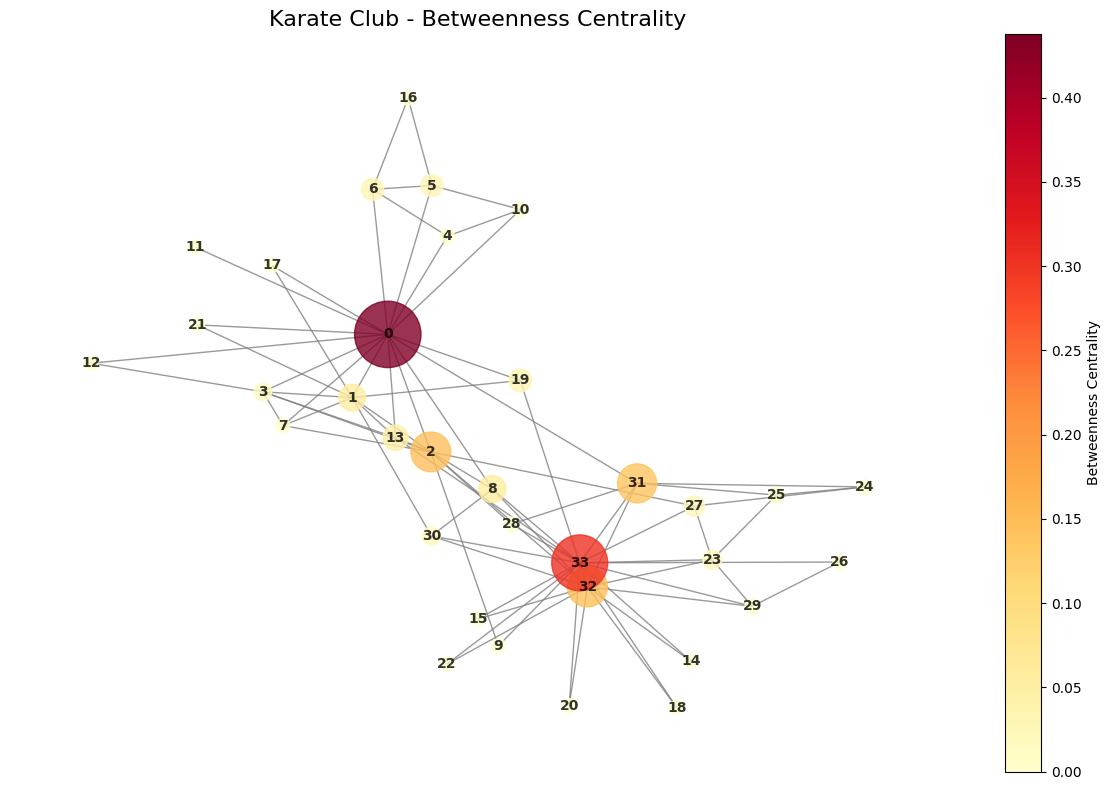

In [50]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print("Top 10 nodes by Betweenness Centrality:")
print("-" * 40)
for node, value in sorted_betweenness[:10]:
    print(f"Node {node}: {value:.4f}")

# Visualization with node size based on betweenness centrality
import matplotlib.cm as cm
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Same layout for comparison

# Scale node sizes based on betweenness centrality
node_sizes = [betweenness[node] * 5000 + 100 for node in G.nodes()]
betweenness_values = list(betweenness.values())

# Create a normalizer for the colorbar
norm = mcolors.Normalize(vmin=min(betweenness_values), vmax=max(betweenness_values))

nx.draw(
    G,
    pos,
    node_size=node_sizes,
    node_color=betweenness_values,
    cmap=plt.cm.YlOrRd,
    with_labels=True,
    edge_color="gray",
    alpha=0.8,
    font_size=10,
    font_weight="bold",
    ax=ax,
)

plt.title("Karate Club - Betweenness Centrality", fontsize=16)
sm = cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Betweenness Centrality")
plt.tight_layout()
plt.show()
